# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | creating indicator variables (for a variable with n options, create n-1 columns and fill with binary 0/1s) |
| **Feature selection*** | Selecting only the most important variables for a regression model |
| **Classifier** | a model that predicts or assigns a category, rather than a numeric value |
| **Precision** | (true positives)/(true positives + false positives) |
| **Recall** | (true positives)/(true positives + false negatives) |
| **F1 Score** | a value to characterize your model, combining precision and recall: 2*(precision*recall)/(precision+recall) |
| **Parsimonious model** | the most simple model, with the fewest possible parameters |
| **Ridge regression** | a penalized regression which reduces the total coefficient sum |
| **LASSO regression** | a penalized regression which forces coefficients to zero (removes them from the model) one by one |
| **Cross validation** | comparing two models, often with k-folds |
| **Tree based methods** | a decision tree which, with repeated "slices," maximizes your data such that either side of the slice is most homogeneous |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?

A perfect classifier's ROC curve would be a rectangle that fills the whole graph. A bad classifier would be a curve covering just half of the space on the graph, or y=x.


#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

A F1 score close to 1 means that the model is performing well, as both precision and recall are high. Conversely, a F1 score close to 0 indicates a poor model, with low precision and recall.

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | diagonal line | s-shape |
| **Dependent Variable Type** | continuous | categorical |
| **Purpose** (regression or classification) | to predict a continuous outcome | to predict the probability that an observation fits in a given category |
| **Range of output variable** ($y_i$ or $p_i$) | (-inf, inf) | [0, 1] |
| **Method*** | identifies a fit line based on minimizing ordinary least squares | maximum likelihood estimation |
| **Example of use** | Predict a person's income based on zip code, education level, career sector, and other related variables | Predict whether a patient would benefit from being connected to social determinants of health resources based on demographic and clinical variables |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

It is important to train then test a model because without testing, you don't have a sense of how well the model will perform with new data. Separating your data into a testing and training dataset can help avoid overfitting.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

A linear regression is appropriate because a key outcome we might be interested in, median house value, is continuous, and it appears to have a positive relationship with other potential variable of interest, median income, for instance.

Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
   population      households     median_income     median_house_value
 Min.   :    3   Min.   :   1.0   Min.   : 0.4999   Min.   : 14999    
 1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634   1st Qu.:119600    
 Median : 1166   Median : 409.0   Median : 3.5348   Median :179700    
 Mean   : 1425   Mean   : 499.5   Mean   : 3.8707   Mean   :206856    
 3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432   3rd Qu.:264725    
 Max.   :35682   Max.   :6082.0   Max.   :15.0001   Max.   :500001    

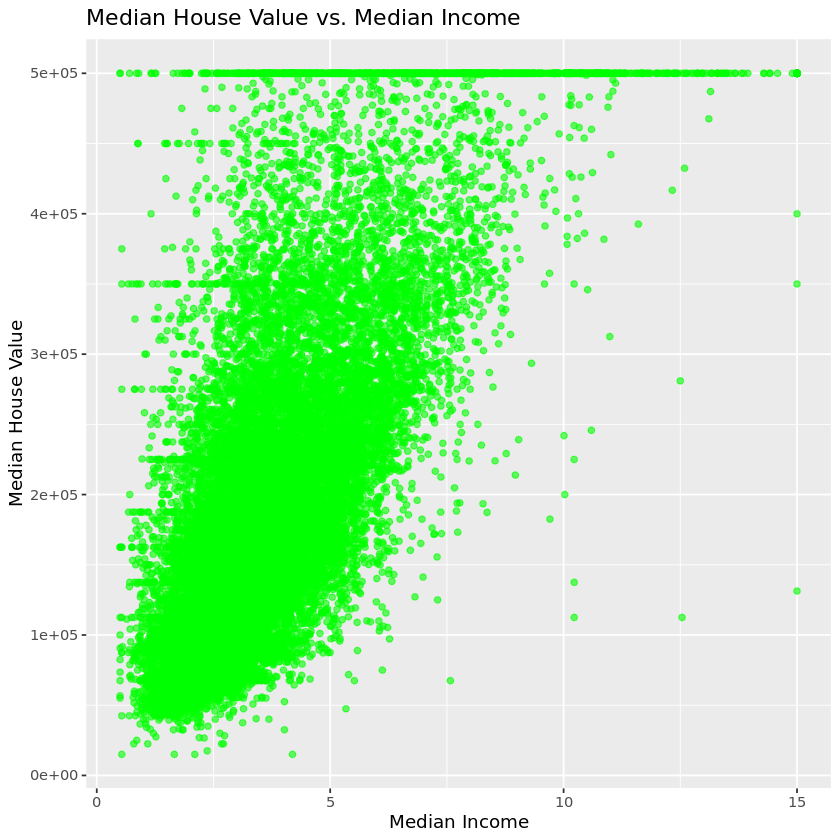

In [65]:
library(tidyverse)
housing <- read_csv("housing.csv")
summary(housing)

ggplot(housing, aes(x = median_income, y = median_house_value)) +
  geom_point(color = "green", alpha = 0.6) +
  labs(
    title = "Median House Value vs. Median Income",
    x = "Median Income",
    y = "Median House Value"
  )

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [66]:
scale <- function(a){
  (a - min(a))/(max(a)-min(a))
}

scaled_q5 <- housing %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
training_q5 <- runif(nrow(scaled_q5)) < 0.75
testing_q5 <- !training_q5

#### c) Fit the model.

In [67]:
f = median_house_value ~ longitude + latitude + housing_median_age +
total_rooms + median_income + population + households

m <- lm(f, data=scaledq5 %>% filter(training_q5))

summary(m)


Call:
lm(formula = f, data = scaledq5 %>% filter(training_q5))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
median_income       1.143536   0.010837  105.52   <2e-16 ***
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

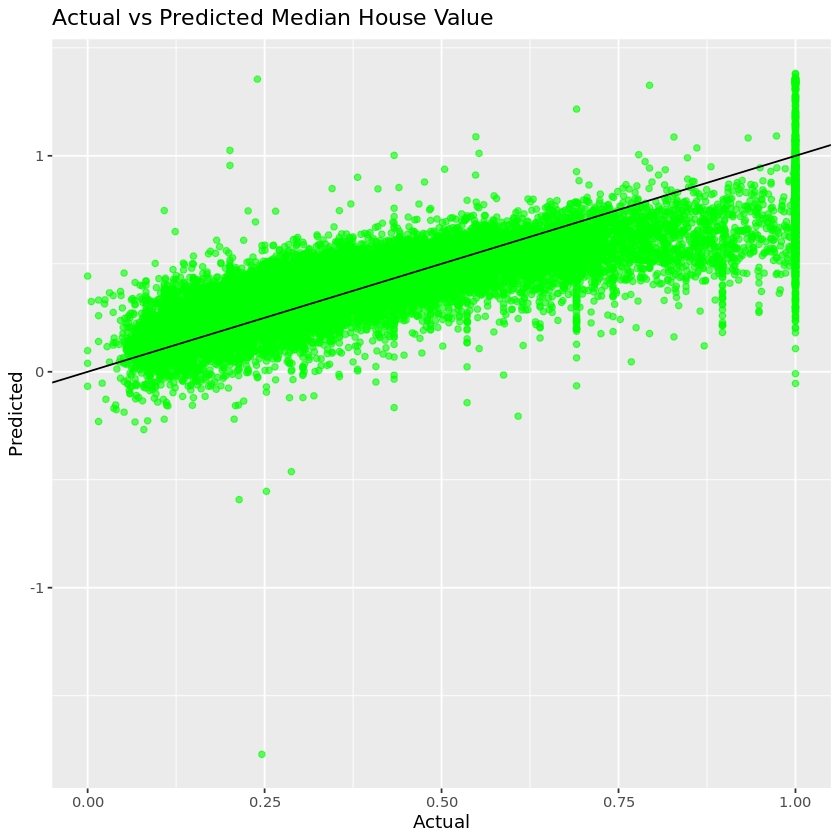

In [68]:
scaled_q5 <- scaled_q5 %>%
  mutate(median_house_value_pred = predict(m, newdata = scaled_q5))

ggplot(scaled_q5, aes(x = median_house_value, y = median_house_value_pred)) +
  geom_point(alpha = 0.6, color = "green") +
  geom_abline(slope = 1, intercept = 0) +
  labs(title = "Actual vs Predicted Median House Value",
       x = "Actual",
       y = "Predicted")

#### e) Make a residuals plot.

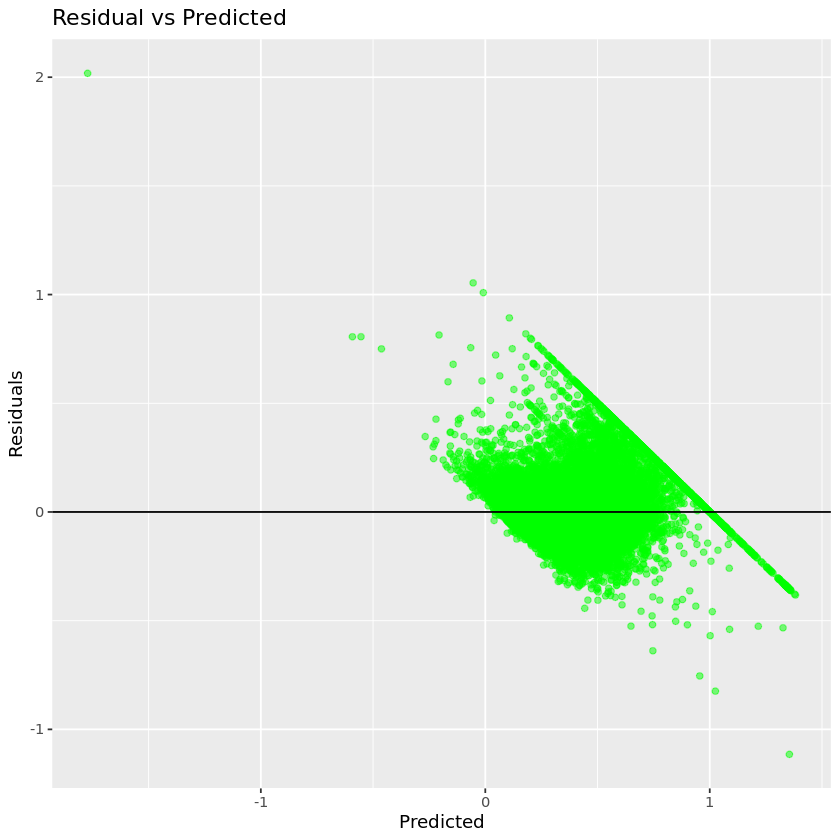

In [69]:
ggplot(scaled_q5, aes(x = median_house_value_pred, y = median_house_value - median_house_value_pred)) +
  geom_point(alpha = 0.5, color = "green") +
  geom_hline(yintercept = 0) +
  labs(title = "Residual vs Predicted", 
       x = "Predicted", 
       y = "Residuals")


## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

A logistic regression is appropriate because the variable "outcome" is binary: the possible values are 0 or 1.

In [18]:
diabetes <- read_csv("diabetes.csv")
summary(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [44]:
scaled_q6 <- diabetes %>% select(where(is.numeric)) %>%
  mutate(across(where(is.numeric), scale))

set.seed(123)
n <- nrow(scaled_q6)
train_idx <- sample.int(n, size = floor(0.1 * n))

training_q6 <- scaled_q6 %>% slice(train_idx)
testing_q6  <- scaled_q6 %>% slice(setdiff(seq_len(n), train_idx))

training_q6 %>% write_csv("training_q6.csv")
testing_q6  %>% write_csv("testing_q6.csv")

#### c) Fit the model.

In [70]:
f <- Outcome ~ .

m <- glm(f, data = training_q6, family = binomial())

summary(m)


Call:
glm(formula = f, family = binomial(), data = training_q6)

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -8.2848     2.3250  -3.563 0.000366 ***
Pregnancies                1.8716     1.5354   1.219 0.222848    
Glucose                    5.0362     2.1896   2.300 0.021446 *  
BloodPressure              0.2239     2.3883   0.094 0.925307    
SkinThickness              1.4403     2.3091   0.624 0.532776    
Insulin                   -1.2769     2.0595  -0.620 0.535259    
BMI                        7.2613     4.2227   1.720 0.085507 .  
DiabetesPedigreeFunction   0.7208     1.9228   0.375 0.707739    
Age                        1.0054     1.8917   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Number of Fishe

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [72]:
p <- predict(m, newdata = testing_q6, type = "response")
pred <- as.integer(p >= 0.5)
truth <- testing_q6$Outcome

truepos <- sum(pred == 1 & truth == 1)
falsepos <- sum(pred == 1 & truth == 0)
trueneg <- sum(pred == 0 & truth == 0)
falseneg <- sum(pred == 0 & truth == 1)
acc <- (truepos+trueneg) / (truepos+falsepos+trueneg+falseneg)

df <- tibble(
 measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
 value   = c(truepos, falsepos, trueneg, falseneg, acc))

df

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

The most important variables appear to be: pregnancies, glucose, and BMI (the others are zeroed out). Additionally, accuracy increased with the LASSO model.

In [57]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-7



In [80]:
# Response and predictor matrices
training_x <- model.matrix(Outcome ~ ., training_q6)[, -1]  # remove intercept column
training_y <- training_q6$Outcome
testing_x  <- model.matrix(Outcome ~ ., testing_q6)[, -1]
testing_y  <- testing_q6$Outcome

# Fit LASSO 
set.seed(123)
cvfit <- cv.glmnet(training_x, training_y, alpha = 1, family = "binomial")

# Coefficients based on lambda
coef(cvfit, s = "lambda.min")

# Predict 
predict_prob <- predict(cvfit, newx = testing_x, s = "lambda.min", type = "response")
predict <- as.integer(predict_prob >= 0.5)

# Performance metrics
truepos <- sum(pred == 1 & testing_y == 1)
falsepos <- sum(pred == 1 & testing_y == 0)
trueneg <- sum(pred == 0 & testing_y == 0)
falseneg <- sum(pred == 0 & testing_y == 1)
acc <- (truepos+trueneg) / (truepos+falsepos+trueneg+falseneg)

df <- tibble(
 measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
 value   = c(truepos, falsepos, trueneg, falseneg, acc))

df

9 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)              -4.653919
Pregnancies               1.073443
Glucose                   3.455152
BloodPressure             .       
SkinThickness             .       
Insulin                   .       
BMI                       3.507260
DiabetesPedigreeFunction  .       
Age                       .       

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### f) Make a plot of actual vs. predicted values for the LASSO model.

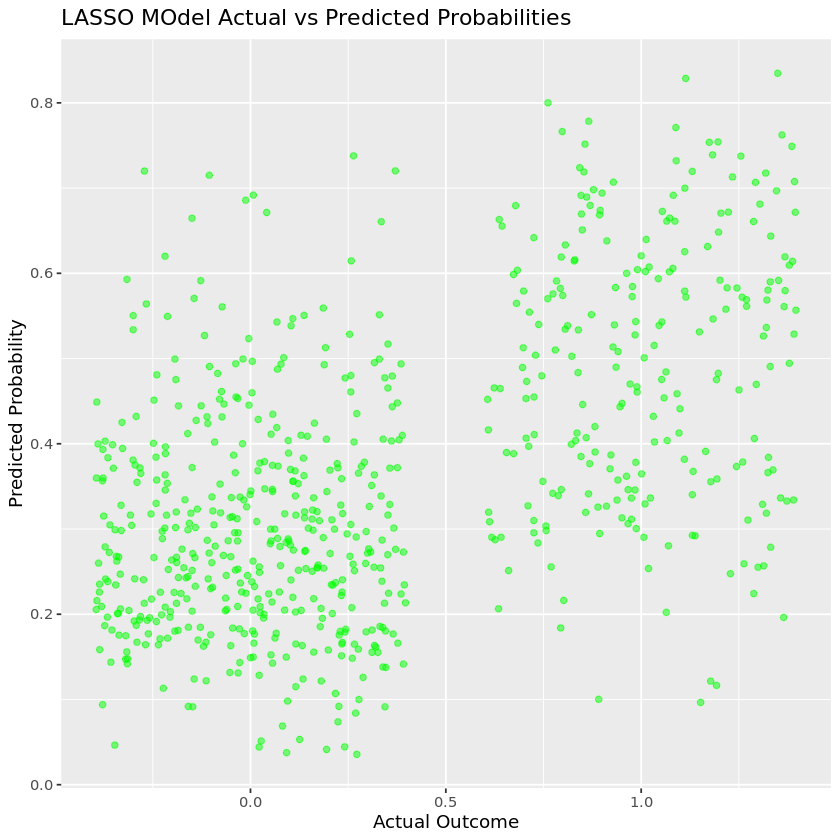

In [81]:
plot <- data.frame(
  actual = testing_y,
  predicted_prob = as.numeric(lasso_pred_prob))

ggplot(plot, aes(x = actual, y = predicted_prob)) +
  geom_jitter(alpha = 0.5, color="green") +
  labs(
    title = "LASSO MOdel Actual vs Predicted Probabilities",
    x = "Actual Outcome",
    y = "Predicted Probability")